<a href="https://colab.research.google.com/github/Sara-Bora/HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Importing the dataset
hr=pd.read_csv("hr.csv")

In [9]:
hr.head() # The head() gives the first 5 rows of the dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [10]:
hr.info() #The info() method prints information about the DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8089 entries, 0 to 8088
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           8089 non-null   int64  
 1   department            8089 non-null   object 
 2   region                8089 non-null   object 
 3   education             7701 non-null   object 
 4   gender                8089 non-null   object 
 5   recruitment_channel   8089 non-null   object 
 6   no_of_trainings       8089 non-null   int64  
 7   age                   8089 non-null   int64  
 8   previous_year_rating  7480 non-null   float64
 9   length_of_service     8089 non-null   int64  
 10  awards_won?           8089 non-null   int64  
 11  avg_training_score    8089 non-null   int64  
 12  is_promoted           8089 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 821.7+ KB


There are a few columns that have the datatype as 'object' which are strings. There are also missing values in the column 'education' and 'previous_year_rating'. We will need to handle column types and missing values in data cleaning.

In [11]:
hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,8089.000000,8089.000000,8089.000000,7480.000000,8089.000000,8089.000000,8089.000000,8089.000000
mean,38967.264680,1.251329,34.789591,3.344251,5.928050,0.024107,63.716529,0.089504
std,22519.426535,0.602916,7.654976,1.248856,4.334723,0.153390,13.547655,0.285488
min,5.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19445.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,38668.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58530.000000,1.000000,39.000000,4.000000,8.000000,0.000000,77.000000,0.000000
max,78287.000000,10.000000,60.000000,5.000000,34.000000,1.000000,99.000000,1.000000


# DATA CLEANING

## 1.Handling Missing Values

In [12]:
hr.isnull().sum()

employee_id               0
department                0
region                    0
education               388
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    609
length_of_service         0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

- The isnull() command will go through each and every record in the data frame and will give a boolean value which represents 'False' for no null and 'True' for null.
- The .sum() will count the number of true values in each feature and will give the sum of the number of Trues which rerpesernt the null values in the data frame.

In [13]:
#Total number of missing values in 'Education' column
hr.education.isnull().sum()

388

This shows the total number of null values only in the 'Education' column.

In [14]:
def fill_missing(df, column, value):
    df_copy = df.copy()
    df_copy[column].fillna(value=value,inplace=True)
    return df_copy

hr = fill_missing(hr, "education", "others")
hr = fill_missing(hr, "previous_year_rating", 1.0)

In [15]:
hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Here, we have replaced the null values separately for the 'Education' and 'Previous Year Training' column.

## 2. Converting 'object' columns into categorical


In [16]:
hr.department.value_counts()

Sales & Marketing    2438
Operations           1637
Technology           1118
Procurement          1061
Analytics             824
HR                    353
Finance               348
Legal                 160
R&D                   150
Name: department, dtype: int64

In [17]:
hr.education.value_counts()

Bachelor's          5373
Master's & above    2208
others               388
Below Secondary      120
Name: education, dtype: int64

In [18]:
hr.gender.value_counts()

m    5741
f    2348
Name: gender, dtype: int64

In [19]:
hr.recruitment_channel.value_counts()

other       4488
sourcing    3428
referred     173
Name: recruitment_channel, dtype: int64

In [20]:
#Converted 'object' columns into categorical datatype.
def convert_to_category(df, column_list):
    df_copy = df.copy()
    df_copy[column_list] = df_copy[column_list].apply(lambda x: x.astype('category'))
    return df_copy

hr = convert_to_category(hr, ['department','region','education','gender','recruitment_channel'])

In [21]:
hr.duplicated()  #It checks for the duplicates rows and returns as True and False.

0       False
1       False
2       False
3       False
4       False
        ...  
8084    False
8085    False
8086    False
8087    False
8088    False
Length: 8089, dtype: bool

In [22]:
hr.duplicated().sum() #Method sum() along with it, will return the total number of the duplicates in the dataset.

0

In [23]:
hr.drop_duplicates() #Removing the entire duplicates rows values.

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,47386,Technology,region_22,Bachelor's,m,other,2,30,1.0,2,0,83,0
8085,36503,Technology,region_2,Master's & above,f,sourcing,1,41,5.0,11,0,75,0
8086,30267,Sales & Marketing,region_27,Bachelor's,m,other,3,30,3.0,2,0,52,1
8087,38861,Sales & Marketing,region_29,Master's & above,m,sourcing,1,33,3.0,9,0,48,0


# UNIVARIATE ANANLYSIS

**The term univariate analysis refers to the analysis of one variable.'Uni' means one, hence, *Univariate analysis* refers to the analysis of one variable.**

In [24]:
# Remove column 'employee_id' from the dataframe
hr.drop(columns='employee_id',inplace=True)  

#### DISTRIBUTION PLOT

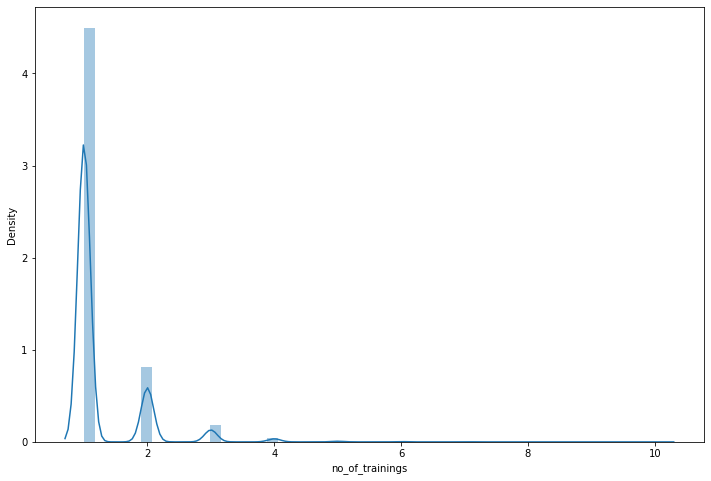

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(hr['no_of_trainings'])
plt.show()

We can see that the data is right skewed.
Most of the employees have received 2 ratings and 3 ratings, so we can see the peak is at two.


#### HISTOGRAM

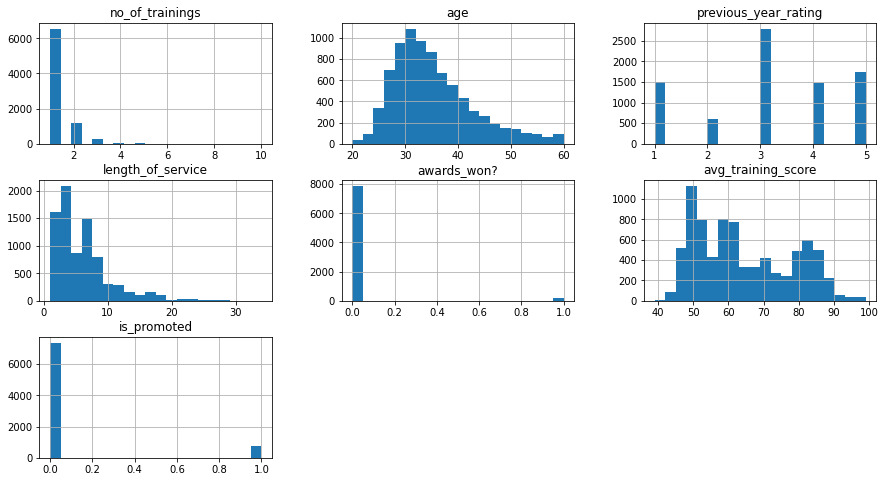

In [26]:
# Histograms of all numerical columns
hr.hist(bins=20, figsize=(15,8))
plt.show()

#### BAR PLOT

In [27]:
hr.education.value_counts()

Bachelor's          5373
Master's & above    2208
others               388
Below Secondary      120
Name: education, dtype: int64

In [28]:
hr.education.value_counts(normalize=True)

Bachelor's          0.664235
Master's & above    0.272963
others              0.047966
Below Secondary     0.014835
Name: education, dtype: float64

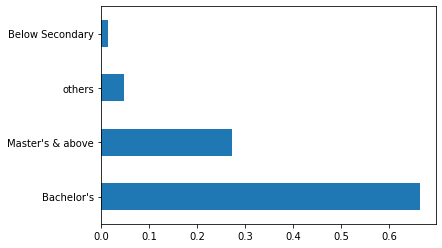

In [29]:
hr.education.value_counts(normalize=True).plot.barh()
plt.show()

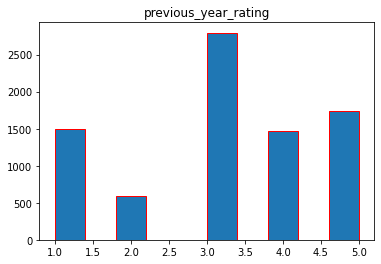

In [30]:
hr.hist(column='previous_year_rating', grid=False, edgecolor='red') 
plt.show()
#hist plot used to summarize discrete or continuous data that are measured on an interval scale.

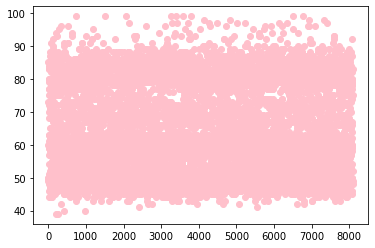

In [31]:
plt.scatter(hr.index,hr['avg_training_score'],color='pink')
plt.show()

#### PIE PLOT

In [32]:
hr.department.value_counts()

Sales & Marketing    2438
Operations           1637
Technology           1118
Procurement          1061
Analytics             824
HR                    353
Finance               348
Legal                 160
R&D                   150
Name: department, dtype: int64

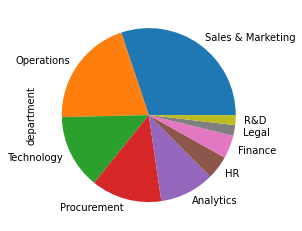

In [33]:
hr.department.value_counts().plot.pie()
plt.show()

#### KERNEL DENSITY PLOT

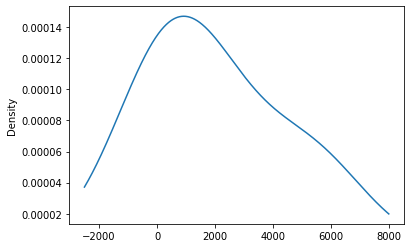

In [34]:
hr.education.value_counts().plot.kde()
plt.show()

#### STRIP PLOT

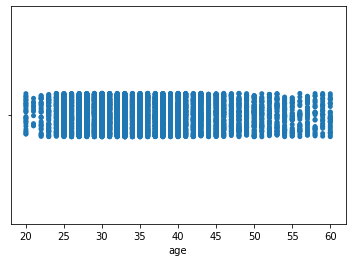

In [35]:
sns.stripplot(x=hr["age"]);

#### BOX PLOT

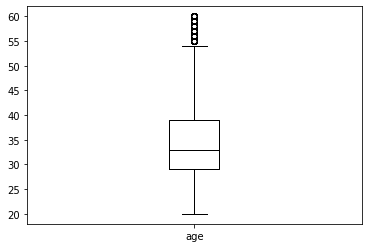

In [36]:
hr.boxplot(column=['age'], grid=False, color='black')

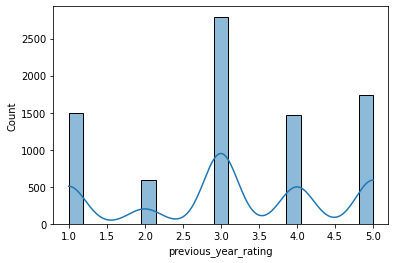

In [37]:
sns.histplot(x='previous_year_rating', data=hr, kde=True)
plt.show()                                               #hist+Kdeplot

#### JOINT PLOT

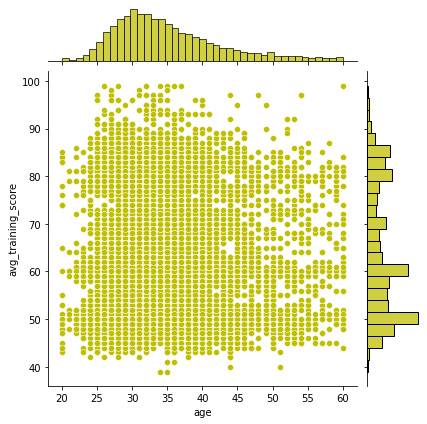

In [38]:
sns.jointplot(y='avg_training_score',x='age',data=hr,color='y')
plt.show()

From, the above pie charts for Education, Gender, and Recruitment Channel, the inferences are :
- Very few employees are working after their secondary education.
- Females are less in number as compared to the males.
- The Recruitment Channel, says that the referred employees are very less, i.e., most of the employees are recruited either by sourcing, or some other recruitment agencies, sources etc.

ValueError: ignored

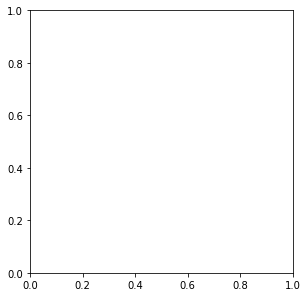

In [103]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = hr['education'].value_counts().index
sizes = hr['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]
           
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = hr['gender'].value_counts().index
sizes = hr['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 1]


plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = hr['recruitment_channel'].value_counts().index
sizes = hr['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode=explode,shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

# BIVARIATE ANALYSIS

### Bivariate analysis is one of the statistical analyses where two variables are observed.


### Numerical - Numerical 
- Scatter Plot, Pair Plot, Heatmap

#### SCATTER PLOT

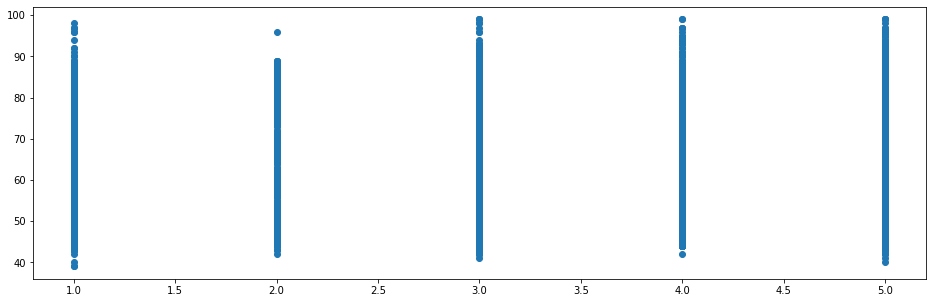

In [43]:
plt.scatter(hr.previous_year_rating, hr.avg_training_score)
plt.show()

#### PAIR PLOT

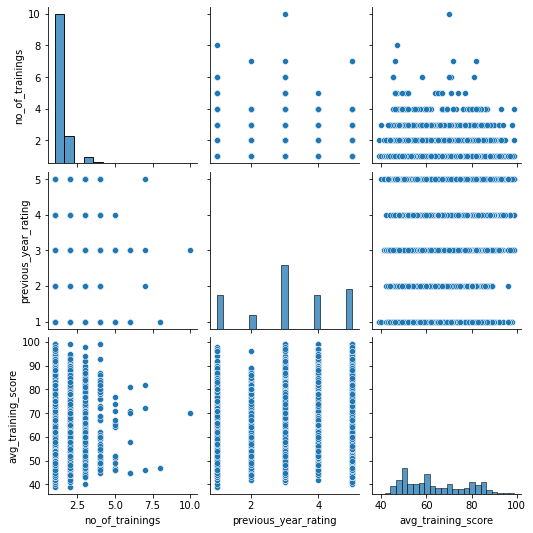

In [44]:
sns.pairplot(data=hr, vars=["no_of_trainings", "previous_year_rating", "avg_training_score"])
plt.show()

### Quantify Using Correlation Values

In [69]:
hr[["age", "length_of_service", "avg_training_score"]].corr()

,age,length_of_service,avg_training_score
age,1.000000,0.674529,-0.055324
length_of_service,0.674529,1.000000,-0.032650
avg_training_score,-0.055324,-0.032650,1.000000


### *Correlation Heatmap*
- Heatmap is used to show the corrleation between the columns this is very useful for regression problems as one of the assumptions of linear model is that the features should not have correlation.

### Numerical - Categorical

#### BAR PLOT

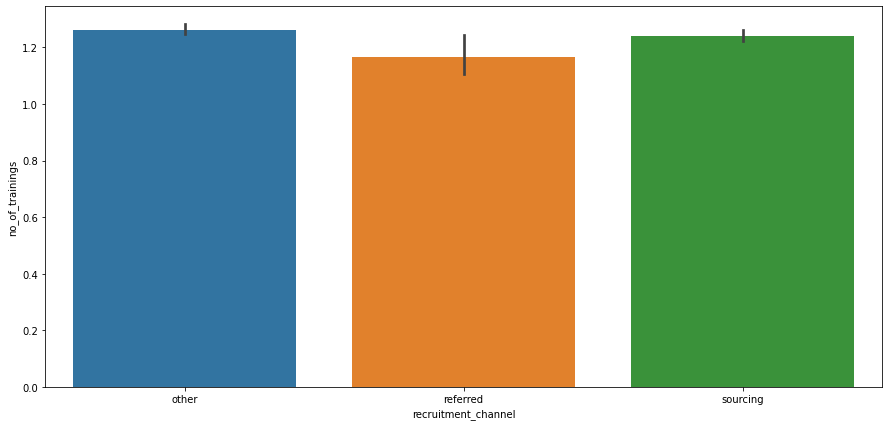

In [70]:
sns.barplot(x='recruitment_channel',y='no_of_trainings',data=hr)
plt.show()

#### BOX PLOT

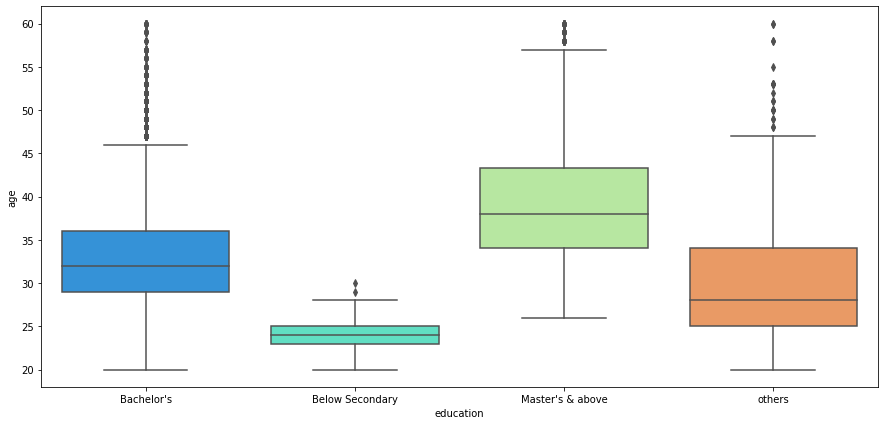

In [71]:
sns.boxplot(x='education',y='age',data=hr, palette='rainbow')
plt.show()

- The coloured region in all the categories represent the 'Inter Quartile Range' which is calculated by (Q3-Q1). This represents the range where most of the data is distributed

### Categorical - Categorical

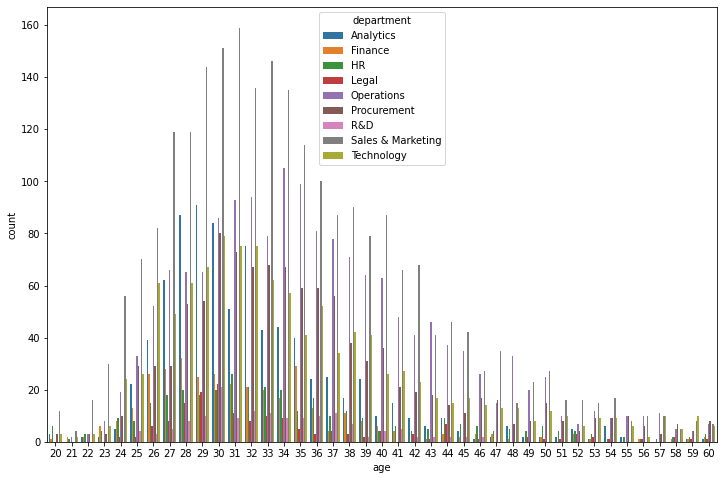

In [72]:
plt.figure(figsize=(12,8))
sns.countplot(hr['age'],hue=hr['department'])
plt.show()

- Regardless of the age, most employees work in the Sales and Marketing department.

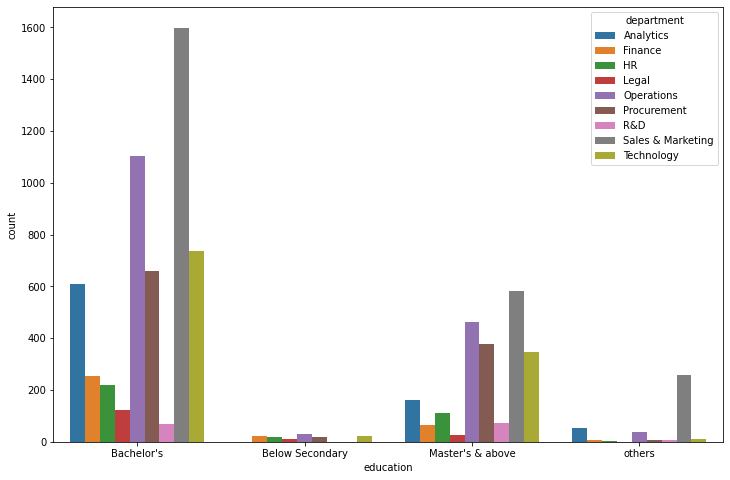

In [73]:
plt.figure(figsize=(12,8))
sns.countplot(hr['education'],hue=hr['department'])
plt.show()

- Most of the employees have the Bachelor's degree.
- Also, suprisingly most of them are from the Sales and Marketing department.

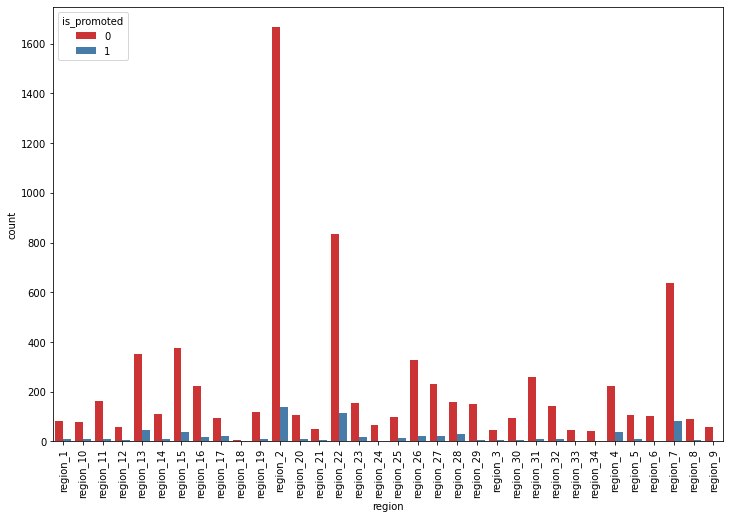

In [74]:
plt.figure(figsize=(12,8))
sns.countplot(hr['region'],hue=hr['is_promoted'],palette='Set1')
plt.xticks(rotation=90)
plt.show()

- Employees are more from the region-2 and most of the employees are promoted from this region.
- region=7, region-22, region-2 have high promotions as there are more employees from this region.

## STATISTICAL ANALYSIS

## Central Limit Theorem
#The Central Limit Theorem(CLT) states that for any data, provided a high number of samples have been taken.
- Sampling Distribution Mean(uₓ-) = Population Mean(u)
- Sampling distribution’s standard deviation (Standard error) = sigma/sq.root(n) ~S/sq.root(n)
- For n > 30, the sampling distribution becomes a normal distribution.

In [75]:
hr.shape

(8089, 12)

In [76]:
#Extracting the age column from the dataset
df = hr[['age']]
df

,age
0,35
1,30
2,34
3,39
4,45
...,...
8084,30
8085,41
8086,30
8087,33


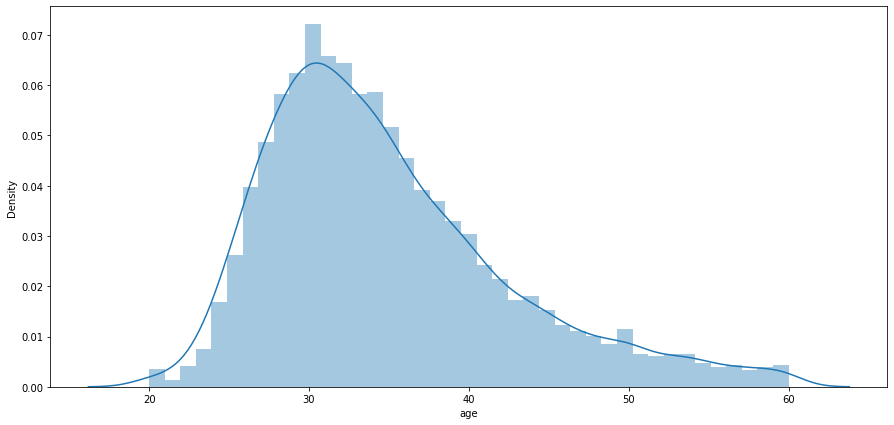

In [77]:
# Plotting the distribution graph using Seaborn Library
sns.distplot(df.age) 
plt.show()

In [78]:
#Mean of the age column
df.age.mean()

34.78959080232414

This is the true mean weight of the population. This is the population parameter.

In [79]:
# Standard deviation of the age column
df.age.std()

7.654975525108124

In [80]:
# Taking a sample size of 30
samp_size = 30

In [81]:
#Mean of the sample taken 
df.age.sample(samp_size).mean()

34.1

This is different from the population mean.
We'll check with another sample.

In [82]:
df.age.sample(samp_size).mean()

35.03333333333333

- This too came out to be different.
- Each time we take a sample, our mean value is different. There is variability in the sample mean itself.We'll assess this.
- We'll take many samples from the data, and plot a histogram of the same.

In [83]:
## Creating multiple number of samples and calculating their mean
sample_means = [df.age.sample(samp_size).mean() for i in range(1000)]
## Storing the mean values in a Series using Pandas
sample_means = pd.Series(sample_means)

In [84]:
## Verifying the total number of samples collected
len(sample_means)

1000

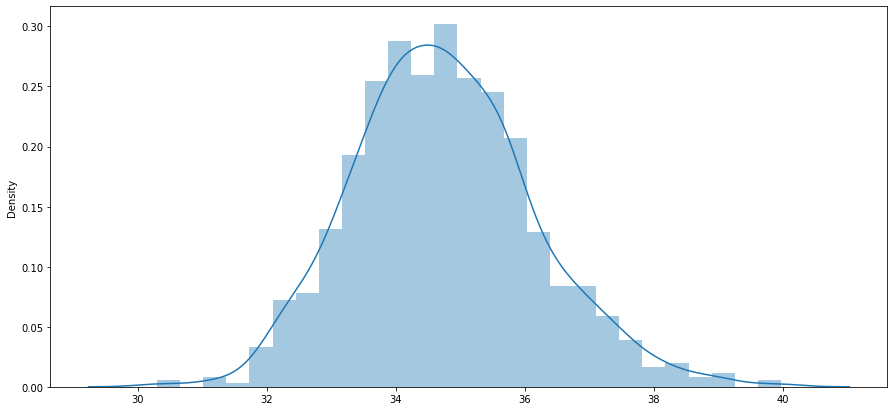

In [85]:
# Plotting the density for the sample means.
sns.distplot(sample_means)
plt.show()

In [86]:
# Mean value of all the 1000 Samples
sample_means.mean()

34.74116666666667

This is approximately same as the parent mean.

In [87]:
# Standard Deviation of all the 1000 Samples
sample_means.std()

1.4073775515773281

#### - Population std vs. std of sampling mean

In [88]:
df.age.std()/np.sqrt(samp_size)

1.3976009240838914

### Effect of sample size

In [89]:
sample_sizes = [3, 10, 30, 50, 100, 200]

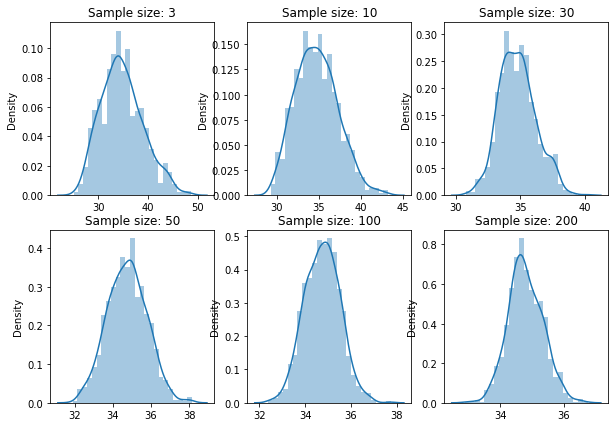

In [90]:
plt.figure(figsize=[10,7])
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df.age.sample(samp_size).mean() for i in range(1000)]
    plt.subplot(2,3,ind+1)
    sns.distplot(sample_means, bins=25)
    plt.title("Sample size: "+str(samp_size))
plt.show()

- From the above graphs, we can say that, when the sample size is small, the resultant sampling distribution is far from normal. But as the sample size increases, the sampling distribution gets normal. Hence, we should consider atleast 30 samples from the population to compute sample means to build the sampling distribution.


- Also, for n > 30, the sampling distribution becomes a normal distribution.

# MULTIVARIATE ANALYSIS

#### Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

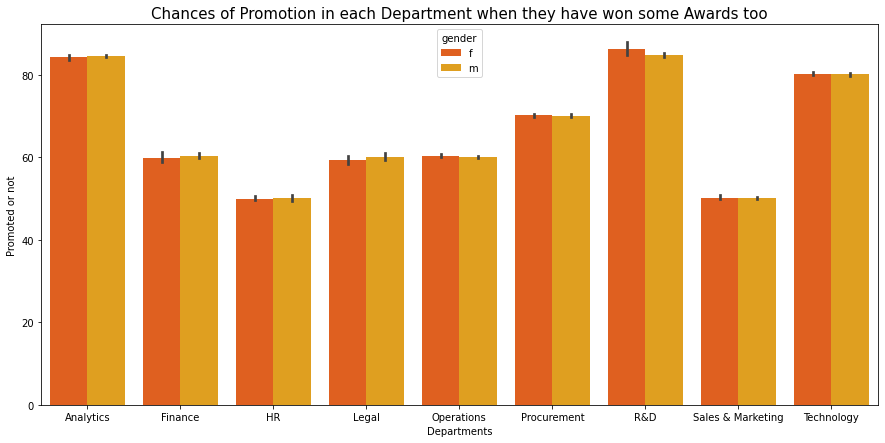

In [91]:
# Lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(hr['department'], hr['avg_training_score'], hue = hr['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

- Clearly, females have more chances of getting promoted as compared to the males in their departments.
- Women belonging to the R&D Department are most likely to get promoted. 

## Various Assumptions:
#### - Most of the employees are from the Sales and Marketing department.
#### - Regardless of the age, employees are promoted unbiasedly.
#### - Females are less in number but rather have high promotion rate than their male counterparts.
#### - People owning a Bachelor's degree are more likely to get promoted as compared to the senior graduates.
#### - Women belonging to the R&D Department are most likely to get promoted.